In [313]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import os, fnmatch
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures 
import seaborn as sns
%matplotlib inline

In [314]:
all_spec_files = []
listOfFiles = os.listdir('./spec')
pattern = "*.spec"
for entry in listOfFiles:
    if fnmatch.fnmatch(entry, pattern):
            all_spec_files.append(entry)

all_fits_files = []
listOfFiles = os.listdir('./specimages')
pattern = "*.fits"
for entry in listOfFiles:
    if fnmatch.fnmatch(entry, pattern):
            all_fits_files.append(entry)
            
            
all_spec_files.sort()
all_fits_files.sort()

In [315]:
def find_id(item_id, id_list):
    for item in id_list:
        if item.split(".fits")[0] == item_id.split(".spec")[0]:
            return True
    return False

In [316]:
obj_vector = []
index = 0
arr_x = []
arr_y = []
f = open("spec/fbs0006-DFBSJ144150.64+430212.2.spec",'r')
for line in f:
    if line[0] != "#":
        arr_y.append(float(line.split(" ")[2]))
        arr_x.append(float(line.split(" ")[4].split("\n")[0]))
    elif (line[0] == "#" and line[1] != "#"):
        if(line[0:3:] != "# r"):
            str_arr = line.split(" ")
#             print(str_arr)
            if(index <= 6):
                if index == 4 or index == 5 :
                    obj_vector.append(float(str_arr[-1].split("\n")[0]))
                else:
                    obj_vector.append(str_arr[-1].split("\n")[0])
            else:
                value = int(float(str_arr[-2]))
                obj_vector.append(value)
                
            index += 1
    
print(obj_vector)

['fbs0006', 'DFBSJ144150.64+430212.2', '14:41:50.640', '+43:02:12.20', 16.75, 15.77, 'U', 79, 20]


In [317]:
df = pd.DataFrame({"wl":arr_x, "in":arr_y})

In [318]:
df

,wl,in
0,1149.3,0.00
1,1109.1,0.18
2,1072.1,0.20
3,1038.0,0.09
4,1006.5,0.02
...,...,...
137,327.2,-0.05
138,326.3,-0.10
139,325.5,-0.08
140,324.7,0.01


/Users/ghevondgevorgyan/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


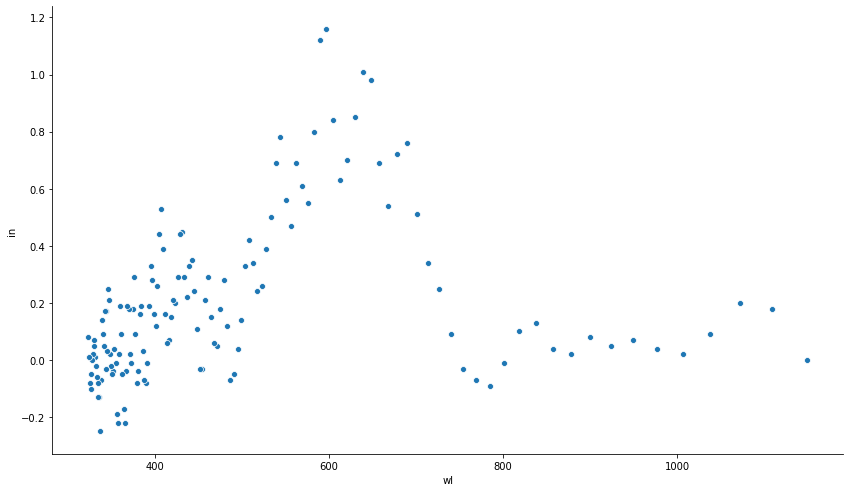

In [319]:
sns.pairplot(df, x_vars = ["wl"], y_vars = ["in"], size = 7, aspect = 1.7, kind = "scatter")

In [320]:
X = df["wl"]
Y = df["in"]


X = X[:, np.newaxis]

poly = PolynomialFeatures(degree = 8) 
X_poly = poly.fit_transform(X) 

poly.fit(X_poly, Y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, Y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Pressure')

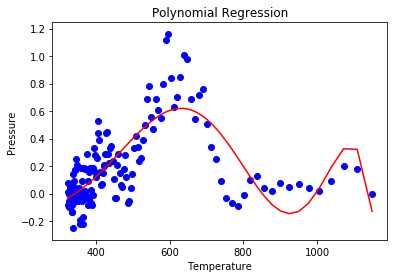

In [321]:
plt.scatter(X, Y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  

In [322]:

print(obj_vector)

['fbs0006', 'DFBSJ144150.64+430212.2', '14:41:50.640', '+43:02:12.20', 16.75, 15.77, 'U', 79, 20]


In [323]:
for coef in lin2.coef_[1:9:]:
    obj_vector.append(coef)

In [324]:
print(obj_vector)

['fbs0006', 'DFBSJ144150.64+430212.2', '14:41:50.640', '+43:02:12.20', 16.75, 15.77, 'U', 79, 20, -8.669999229139874e-14, -6.870182546405393e-16, -3.213101497093818e-13, -5.7509833138649285e-11, 4.272470141148914e-13, -9.41995788584048e-16, 8.291560792281035e-19, -2.567707917893629e-22]
